# Modelos de Regresión Lineal
### Modelo con datos simulados

* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 2 + 0.3 * x + e
* e estará distribuído según una N(0,0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.rand(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist() 
y_act_list = y_act.tolist()

In [7]:
x_list[0:2]

[3.636217288367463, 1.5314081680235045]

In [8]:
y_act_list[0:5]

[7.880621992174964,
 6.798721243019372,
 4.390158688130884,
 5.505625589851984,
 5.055055237632658]

In [9]:
y_pred_list[0:5]

[6.090865186510239,
 5.459422450407051,
 5.547023580926739,
 5.456910315830084,
 5.94336186811578]

In [10]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [11]:
data.head()

,x,y_actual,y_prediccion
0,3.636217,7.880622,6.090865
1,1.531408,6.798721,5.459422
2,1.823412,4.390159,5.547024
3,1.523034,5.505626,5.456910
4,3.144540,5.055055,5.943362


In [12]:
import matplotlib.pyplot as plt

In [13]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

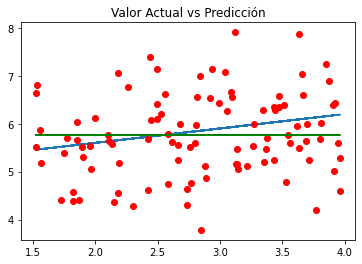

In [14]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [15]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [16]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.636217,7.880622,6.090865,0.111560,3.203229,4.510370
1,1.531408,6.798721,5.459422,0.088468,1.793721,1.085477
2,1.823412,4.390159,5.547024,0.044031,1.338336,1.867869
3,1.523034,5.505626,5.456910,0.089969,0.002373,0.063118
4,3.144540,5.055055,5.943362,0.034783,0.789089,0.492528


In [17]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [18]:
SSR

5.404305056511354

In [19]:
SSD

71.81077792447186

In [20]:
SST

72.80862488295848

In [21]:
SSR + SSD

77.21508298098321

In [22]:
R2 = SSR/SST

In [23]:
R2

0.07422616572142238

(array([ 3.,  6.,  5., 14., 20., 16., 15., 14.,  5.,  2.]),
 array([-1.9701355 , -1.56606942, -1.16200335, -0.75793728, -0.3538712 ,
         0.05019487,  0.45426094,  0.85832702,  1.26239309,  1.66645916,
         2.07052524]),
 <BarContainer object of 10 artists>)

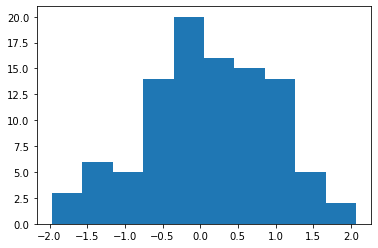

In [24]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión
* y = a + b * x

In [25]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(2.839344808042463, 5.756858787098552)

In [26]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [27]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [28]:
alpha = y_mean-beta*x_mean
alpha, beta

(5.151312577890491, 0.213269697816499)

In [29]:
data["y_model"] = alpha + beta * data["x"]

In [30]:
data

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.636217,7.880622,6.090865,0.111560,3.203229,4.510370,1.692368,0.635006,5.926808
1,1.531408,6.798721,5.459422,0.088468,1.793721,1.085477,-1.362690,1.710698,5.477916
2,1.823412,4.390159,5.547024,0.044031,1.338336,1.867869,1.388476,1.032120,5.540191
3,1.523034,5.505626,5.456910,0.089969,0.002373,0.063118,0.330701,1.732673,5.476130
4,3.144540,5.055055,5.943362,0.034783,0.789089,0.492528,-0.214187,0.093144,5.821948
...,...,...,...,...,...,...,...,...,...
95,2.181083,4.551317,5.654325,0.010513,1.216627,1.453331,0.793562,0.433308,5.616472
96,2.732824,4.644105,5.819847,0.003968,1.382371,1.238222,0.118532,0.011347,5.734141
97,2.769800,4.760945,5.830940,0.005488,1.144888,0.991843,0.069260,0.004836,5.742027
98,3.435698,5.236583,6.030709,0.074994,0.630638,0.270687,-0.310268,0.355637,5.884043


In [31]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [32]:
SSR

2.2756417093564925

In [33]:
SSD

70.53298317360198

In [34]:
SST

72.80862488295848

In [35]:
R2 = SSR / SST
R2

0.03125511178125721

Text(0.5, 1.0, 'Valor Actual vs Predicción')

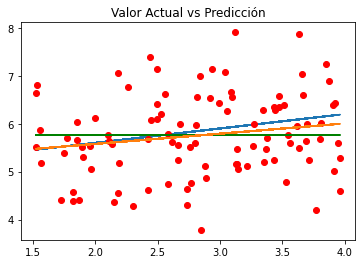

In [43]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y_actual"], "ro")
plt.plot(data["x"],y_mean,"g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Predicción")

Text(0.5, 1.0, 'Valor Actual vs Predicción')

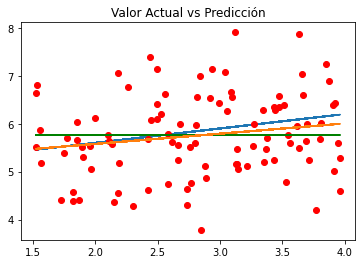

### Error estándar de los residuos (RSE)

In [48]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8483656747523318

In [49]:
np.mean(data["y_actual"])

5.756858787098552

In [50]:
RSE / np.mean(data["y_actual"])

0.14736607343115096